# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [46]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



In [47]:
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

print("\nEmbarked counts (including NaN):")
print(df['Embarked'].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare   

In [48]:
# --- Basic data cleaning ---

# Drop the Cabin column
df = df.drop(columns=['Cabin'])

# Fill missing 'Embarked' values with the most common port
embark_mode = df['Embarked'].mode().iloc[0]
df['Embarked'] = df['Embarked'].fillna(embark_mode)

# Check that it worked
df.isna().sum()[['Age','Embarked']]


Age         177
Embarked      0
dtype: int64

In [49]:
# --- Create helper columns ---

# Family size (parents/children + siblings/spouse + self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Flag passengers who are alone
df['IsAlone'] = df['FamilySize'] == 1

# Group ages into ranges for easier comparison
age_bins = [0, 12, 18, 35, 55, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Peek at the new columns
df[['Sex', 'Pclass', 'Age', 'AgeGroup', 'FamilySize', 'IsAlone', 'Embarked']].head(10)


,Sex,Pclass,Age,AgeGroup,FamilySize,IsAlone,Embarked
0,male,3,22.0,Young Adult,2,False,S
1,female,1,38.0,Adult,2,False,C
2,female,3,26.0,Young Adult,1,True,S
3,female,1,35.0,Young Adult,2,False,S
4,male,3,35.0,Young Adult,1,True,S
5,male,3,NaN,NaN,1,True,Q
6,male,1,54.0,Adult,1,True,S
7,male,3,2.0,Child,5,False,S
8,female,3,27.0,Young Adult,3,False,S
9,female,2,14.0,Teen,2,False,C


In [50]:
# --- Survival pattern analysis ---

print("Survival Rate by Sex:")
print(df.groupby('Sex')['Survived'].mean(), "\n")

print("Survival Rate by Class:")
print(df.groupby('Pclass')['Survived'].mean(), "\n")

print("Survival Rate by Age Group:")
print(df.groupby('AgeGroup')['Survived'].mean(), "\n")

print("Survival Rate by Family Status (IsAlone):")
print(df.groupby('IsAlone')['Survived'].mean(), "\n")

print("Survival Rate by Port of Embarkation:")
print(df.groupby('Embarked')['Survived'].mean())


Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Survival Rate by Age Group:
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Adult          0.401130
Senior         0.300000
Name: Survived, dtype: float64 

Survival Rate by Family Status (IsAlone):
IsAlone
False    0.505650
True     0.303538
Name: Survived, dtype: float64 

Survival Rate by Port of Embarkation:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


C:\Users\15733\AppData\Local\Temp\ipykernel_1568\2393693608.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean(), "\n")


In [51]:
# --- Most likely to survive profile ---
most_likely = df[
    (df['Sex'] == 'female') &
    (df['Pclass'] == 1) &
    (df['Embarked'] == 'C') &
    (df['IsAlone'] == False)
]

most_likely[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'FamilySize', 'Embarked']].head(10)


,Name,Sex,Age,Pclass,Fare,FamilySize,Embarked
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,2,C
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,146.5208,2,C
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,76.7292,2,C
215,"Newell, Miss. Madeleine",female,31.0,1,113.2750,2,C
291,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,91.0792,2,C
299,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,1,247.5208,2,C
307,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,108.9000,2,C
311,"Ryerson, Miss. Emily Borie",female,18.0,1,262.3750,5,C
319,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,134.5000,3,C
329,"Hippach, Miss. Jean Gertrude",female,16.0,1,57.9792,2,C


In [52]:
# --- Least likely to survive profile ---
least_likely = df[
    (df['Sex'] == 'male') &
    (df['Pclass'] == 3) &
    (df['Embarked'] == 'S') &
    (df['IsAlone'] == True)
]

least_likely[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'FamilySize', 'Embarked']].head(10)


,Name,Sex,Age,Pclass,Fare,FamilySize,Embarked
4,"Allen, Mr. William Henry",male,35.0,3,8.0500,1,S
12,"Saundercock, Mr. William Henry",male,20.0,3,8.0500,1,S
29,"Todoroff, Mr. Lalio",male,NaN,3,7.8958,1,S
37,"Cann, Mr. Ernest Charles",male,21.0,3,8.0500,1,S
45,"Rogers, Mr. William John",male,NaN,3,8.0500,1,S
51,"Nosworthy, Mr. Richard Cater",male,21.0,3,7.8000,1,S
67,"Crease, Mr. Ernest James",male,19.0,3,8.1583,1,S
74,"Bing, Mr. Lee",male,32.0,3,56.4958,1,S
75,"Moen, Mr. Sigurd Hansen",male,25.0,3,7.6500,1,S
76,"Staneff, Mr. Ivan",male,NaN,3,7.8958,1,S


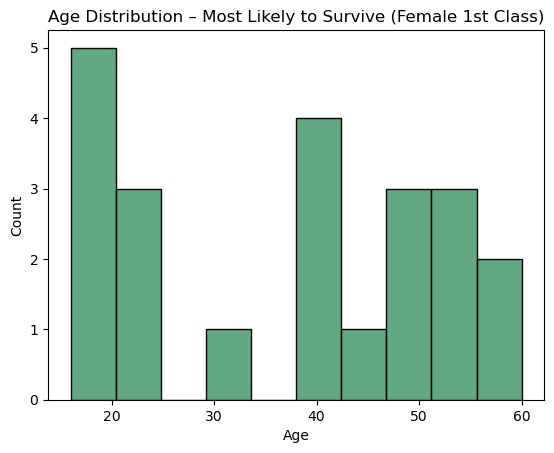

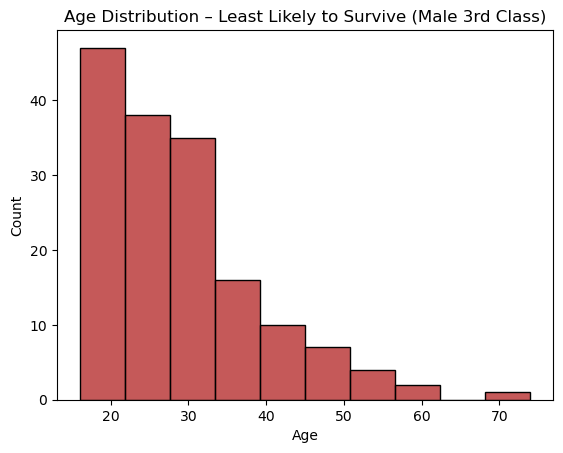

C:\Users\15733\AppData\Local\Temp\ipykernel_1568\4026441453.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='muted')


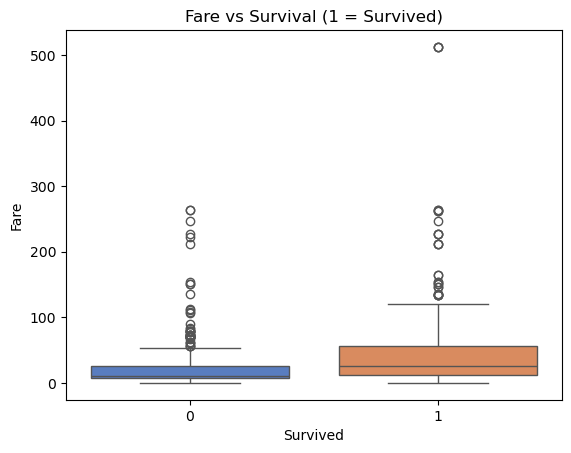

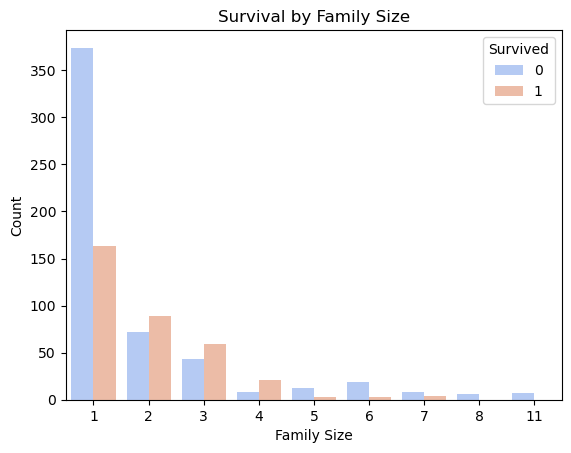

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Age Distribution ---
sns.histplot(data=most_likely, x='Age', color='seagreen', bins=10)
plt.title('Age Distribution – Most Likely to Survive (Female 1st Class)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.histplot(data=least_likely, x='Age', color='firebrick', bins=10)
plt.title('Age Distribution – Least Likely to Survive (Male 3rd Class)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# --- Fare Comparison ---
sns.boxplot(x='Survived', y='Fare', data=df, palette='muted')
plt.title('Fare vs Survival (1 = Survived)')
plt.show()

# --- Family Size Impact ---
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


Final Summary for James Cameron

Using the Titanic passenger data, I developed two historically grounded character profiles for the film reboot.

Most Likely to Survive

Profile: Female | 1st Class | Embarked from Cherbourg (C) | Traveled with Family | Adult

Example Passenger: Mrs. John Bradley (Florence Briggs Thayer) Cumings

Evidence: Females had a 74% survival rate; 1st-class passengers had a 63% rate.

Interesting Fact: Mrs. Cumings escaped in Lifeboat #4 and later testified in the Senate inquiry about the ship’s final moments.

Least Likely to Survive

Profile: Male | 3rd Class | Embarked from Southampton (S) | Traveled Alone | Young Adult

Example Passenger: Mr. William Henry Allen

Evidence: Males survived only 19%; 3rd-class passengers just 24%; those alone about 30%.

Interesting Fact: Mr. Allen, age 35, perished in the sinking and his body was never recovered.

Conclusion

Statistical evidence confirms that class, gender, and family presence were the strongest predictors of survival.
For a film reboot, these two archetypes, the privileged 1st-class woman saved early and the lone 3rd-class man trapped below would provide historically accurate, emotionally resonant contrasts.


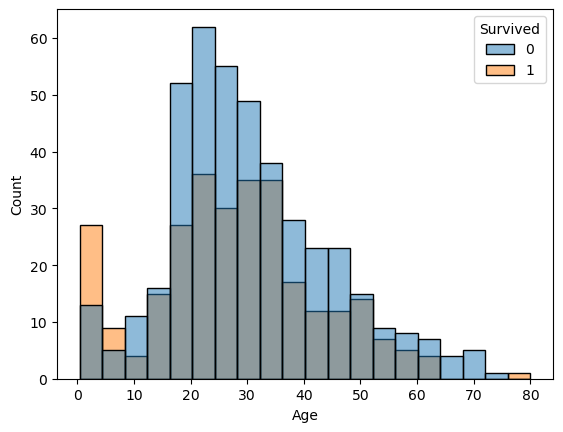

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Age', data=df, hue='Survived')

plt.show()

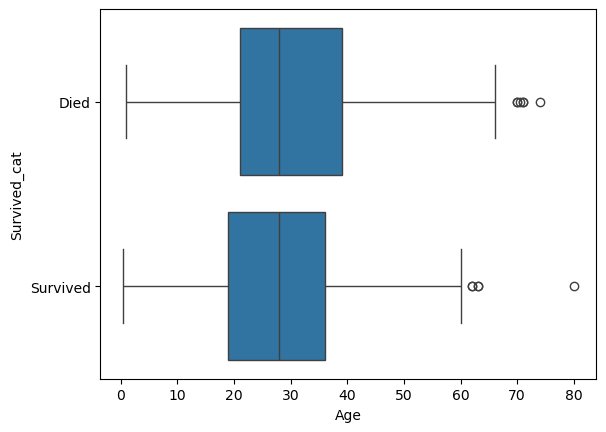

In [56]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Age', data=df, y='Survived_cat')
plt.show()

In [57]:
df['Survived'].dtype

dtype('int64')

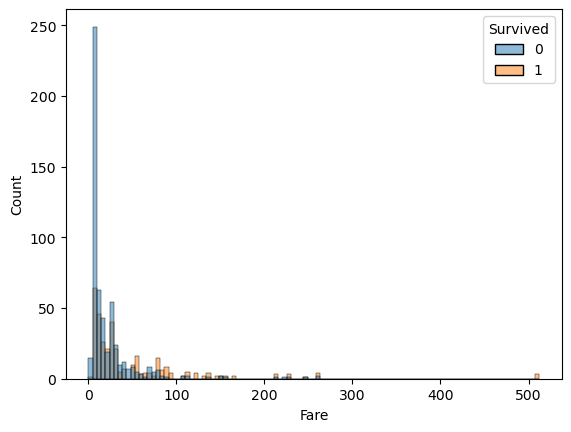

In [58]:
sns.histplot(x='Fare', data=df, hue='Survived')

plt.show()

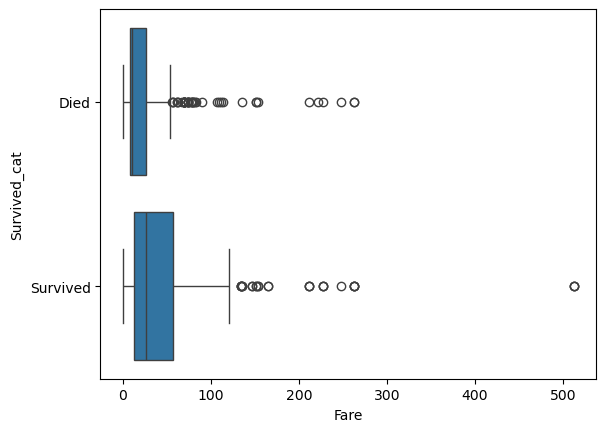

In [59]:
sns.boxplot(x='Fare', data=df, y='Survived_cat')

plt.show()